# Geração de Variáveis Aleatórias Discretas Usando a Técnica da Inversão

A **técnica da inversão** é uma maneira poderosa de gerar variáveis aleatórias (v.a.) a partir de uma distribuição arbitrária, usando números aleatórios uniformes no intervalo $[0, 1)$. A ideia básica é usar a **função de distribuição acumulada (CDF)** para mapear um número uniforme gerado entre 0 e 1 para o valor correspondente da v.a. discreta.

Passos Gerais para Gerar Variáveis Aleatórias Discretas com a Técnica da Inversão:
1. **Calcular a CDF** da variável aleatória que se deseja gerar.
2. **Gerar um número aleatório uniforme** $u \in [0, 1)$.
3. Encontrar o valor da variável aleatória cuja CDF seja maior ou igual a $u$.
4. Retornar esse valor como a variável aleatória gerada.

## Geração de Variáveis Aleatórias Discretas Genéricas

Dado um conjunto de probabilidades $ p(x_i) $, onde $ x_i $ são os valores possíveis da variável aleatória discreta, e $ p(x_i) $ são suas respectivas probabilidades, a CDF $ F(x) $ é calculada como:

$$
F(x_i) = \sum_{j=1}^{i} p(x_j)
$$

O algoritmo para gerar uma variável aleatória discreta genérica é:
1. Gerar um número aleatório $ u \in [0, 1) $.
2. Encontrar o menor valor $ x_i $ tal que $ F(x_i) \geq u $.
3. Retornar $ x_i $.

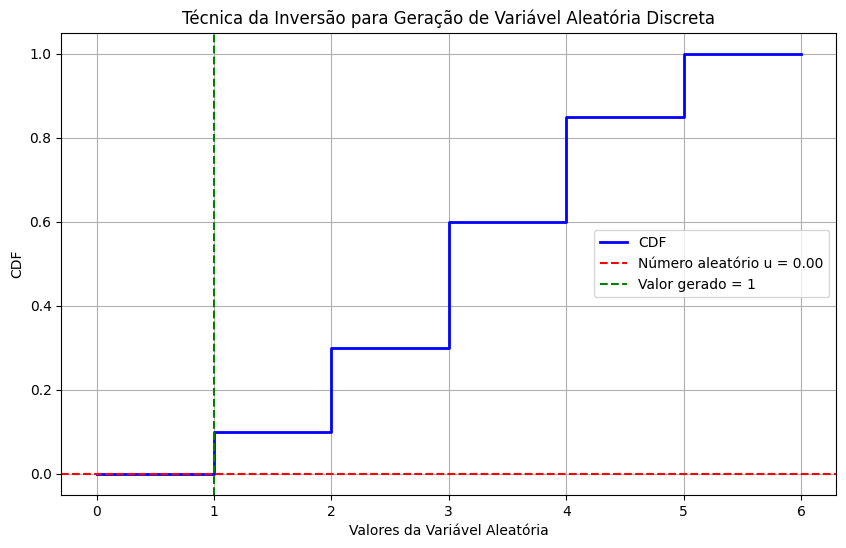

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exemplo de valores e probabilidades de uma variável aleatória discreta
valores = [0, 1, 2, 3, 4, 5, 6]
probabilidades = [0, 0.1, 0.2, 0.3, 0.25, 0.15, 0]

# Calculando a CDF
cdf = np.cumsum(probabilidades)

# Gerando um número aleatório uniforme
u = np.random.uniform(0, 1)

# Encontre o valor correspondente na CDF
valor_gerado = None
for i, valor in enumerate(valores):
    if u < cdf[i]:
        valor_gerado = valor
        break
# Ajustando o gráfico para corrigir a visualização da CDF e garantir que os valores estejam corretamente posicionados
plt.figure(figsize=(10, 6))

# Ajustando o eixo x para que a CDF comece e termine corretamente
plt.step(valores, cdf, label='CDF', color='blue', linewidth=2, where='post')
plt.axhline(y=u, color='red', linestyle='--', label=f'Número aleatório u = {u:.2f}')
plt.axvline(x=valor_gerado, color='green', linestyle='--', label=f'Valor gerado = {valor_gerado}')
plt.title('Técnica da Inversão para Geração de Variável Aleatória Discreta')
plt.xlabel('Valores da Variável Aleatória')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()


## Inversa da CDF

A **inversa da CDF** (função de distribuição acumulada), também conhecida como a **função quantil** ou **função percentil**, é uma função utilizada para gerar variáveis aleatórias a partir de uma distribuição específica.

**Definição:** Seja $F(x)$ a função de distribuição acumulada (CDF) de uma variável aleatória $X$. A inversa da CDF, denotada por $F^{-1}(p)$, é definida como:

$$
F^{-1}(p) = \inf \{ x \in \mathbb{R} : F(x) \geq p \}, \quad \text{para } p \in [0, 1]
$$

Em palavras:
- A inversa da CDF $F^{-1}(p)$ mapeia um número $p$, que representa uma probabilidade acumulada, de volta ao valor $x$ correspondente da variável aleatória $X$, tal que a probabilidade acumulada até $x$ é igual a $p$.
- Isso significa que, se $p = F(x)$, então $F^{-1}(p) = x$.


## Geração de Variáveis Aleatórias com Distribuição Geométrica

A distribuição geométrica modela o número de tentativas até o primeiro sucesso em uma sequência de experimentos de Bernoulli. Se a probabilidade de sucesso em cada tentativa é $ p $, a PMF é dada por:

### Derivação da Inversa da CDF para a Distribuição Geométrica

A fórmula da **inversa da CDF** para a distribuição geométrica foi obtida a partir da definição da função de distribuição acumulada (CDF) da distribuição geométrica e da aplicação da técnica da inversão.

#### CDF da Distribuição Geométrica

A função de distribuição acumulada (CDF) da distribuição geométrica com parâmetro $p$ (a probabilidade de sucesso) para o número de falhas $k-1$ antes do primeiro sucesso é dada por:

$$
F(k) = 1 - (1 - p)^k
$$

Essa equação expressa a probabilidade acumulada de obter o primeiro sucesso em até $k$ tentativas.

#### Inversa da CDF

Queremos encontrar a **inversa da CDF**, ou seja, a fórmula que, dado um valor $u$ entre 0 e 1, nos permita calcular o valor $k$ tal que $F(k) = u$.

Sabemos que:

$$
u = F(k) = 1 - (1 - p)^k
$$

Nosso objetivo é resolver essa equação para $k$. Vamos fazer isso passo a passo.

#### Isolando o termo com $k$

Começamos isolando o termo $(1 - p)^k$:

$$
u = 1 - (1 - p)^k
$$

Subtraindo 1 de ambos os lados:

$$
u - 1 = - (1 - p)^k
$$

Multiplicando ambos os lados por $-1$:

$$
1 - u = (1 - p)^k
$$

#### Aplicando o Logaritmo

Agora aplicamos o logaritmo natural (log base $e$) em ambos os lados para resolver $k$:

$$
\log(1 - u) = \log((1 - p)^k)
$$

Usando a propriedade dos logaritmos que permite trazer o expoente $k$ para frente:

$$
\log(1 - u) = k \cdot \log(1 - p)
$$

#### Isolando $k$

Agora, isolamos $k$:

$$
k = \frac{\log(1 - u)}{\log(1 - p)}
$$

Como $k$ precisa ser um número inteiro (já que a distribuição geométrica conta o número de tentativas), usamos a função de arredondamento "para cima" ($\lceil \cdot \rceil$), conhecida como a **função teto**:

$$
k = \lceil \frac{\log(1 - u)}{\log(1 - p)} \rceil
$$

### Conclusão

Portanto, a fórmula da inversa da CDF da distribuição geométrica é:

$$
k = \lceil \frac{\log(1 - u)}{\log(1 - p)} \rceil
$$

Esta fórmula nos permite gerar variáveis aleatórias com distribuição geométrica a partir de um número aleatório uniforme $u \in [0, 1)$.


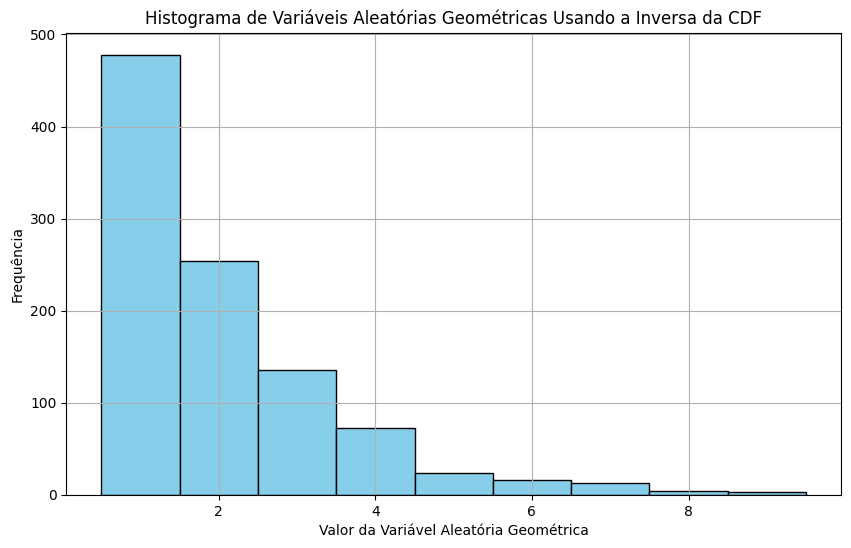

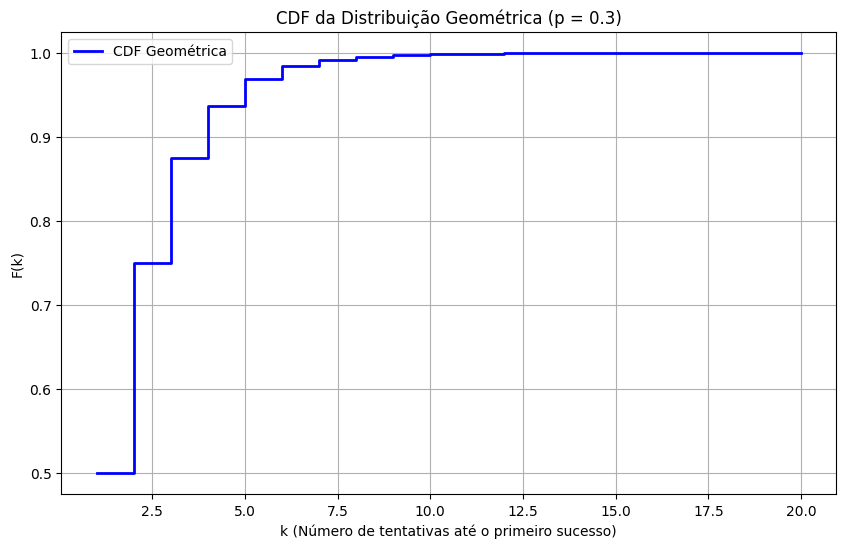

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Função para gerar a inversa da CDF para a distribuição geométrica
def inversa_cdf_geometrica(p, u):
    # Usando a fórmula inversa da CDF geométrica: F⁻¹(u) = ceil(log(1 - u) / log(1 - p))
    k = np.ceil(np.log(1 - u) / np.log(1 - p))
    return int(k)

# Parâmetro p da distribuição geométrica
p = 0.5

# Gerando 100 números uniformemente distribuídos
uniformes = np.random.uniform(0, 1, 1000)

# Gerando a variável aleatória geométrica correspondente para cada número uniforme
geometricas = [inversa_cdf_geometrica(p, u) for u in uniformes]

# Plotando um histograma das variáveis geométricas geradas
plt.figure(figsize=(10, 6))
plt.hist(geometricas, bins=range(1, max(geometricas) + 1), color='skyblue', edgecolor='black', align='left')
plt.title('Histograma de Variáveis Aleatórias Geométricas Usando a Inversa da CDF')
plt.xlabel('Valor da Variável Aleatória Geométrica')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Calculando a CDF para a distribuição geométrica
def cdf_geometrica(k, p):
    return 1 - (1 - p)**k

# Gerando valores de k para plotar a CDF
k_values = np.arange(1, 21)
cdf_values = [cdf_geometrica(k, p) for k in k_values]

# Plotando a CDF da distribuição geométrica
plt.figure(figsize=(10, 6))
plt.step(k_values, cdf_values, where='post', color='blue', label='CDF Geométrica', linewidth=2)
plt.title('CDF da Distribuição Geométrica (p = 0.3)')
plt.xlabel('k (Número de tentativas até o primeiro sucesso)')
plt.ylabel('F(k)')
plt.grid(True)
plt.legend()
plt.show()


## Geração de Variáveis Aleatórias com Distribuição Poisson

A distribuição de Poisson é usada para modelar o número de eventos que ocorrem em um intervalo de tempo ou espaço fixo, onde os eventos ocorrem com uma taxa constante $ \lambda $ e de forma independente.

A função de probabilidade de massa (PMF) da distribuição de Poisson é dada por:

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0, 1, 2, \ldots
$$

### Derivação da Inversa da CDF para a Distribuição Poisson Usando a Fórmula Recursiva

A **distribuição de Poisson** tem uma fórmula recursiva que pode ser usada para calcular as probabilidades de forma mais eficiente. Em vez de recalcular a probabilidade $P(X = k)$ a cada vez, podemos usar a seguinte relação recursiva:

$$
P(X = k+1) = \frac{\lambda}{k+1} \cdot P(X = k)
$$

Onde $P(X = 0) = e^{-\lambda}$.

Essa relação recursiva permite gerar variáveis aleatórias de Poisson sem precisar calcular fatoriais repetidamente, o que é mais eficiente para grandes valores de $\lambda$ ou grandes números de eventos $k$.

### Técnica da Inversão Usando a Fórmula Recursiva

Para gerar uma variável aleatória de Poisson usando a técnica da inversão e a fórmula recursiva, o processo é o seguinte:

1. Gerar um número aleatório uniforme $u \in [0, 1)$.
2. Calcular a CDF acumulada para valores de $k$, somando as probabilidades da PMF (usando a relação recursiva) até que a CDF acumulada seja maior ou igual a $u$.
3. O menor valor $k$ tal que $F(k) \geq u$ será o número de eventos gerado pela distribuição Poisson.

### Explicação:

1. **Fórmula Recursiva**: A relação recursiva $P(X = k+1) = \frac{\lambda}{k+1} \cdot P(X = k)$ permite calcular as probabilidades de forma eficiente, atualizando a probabilidade de $P(X = k+1)$ a partir de $P(X = k)$.
   
2. **Eficiência**: Esta técnica evita o cálculo repetido de fatoriais, tornando-a mais eficiente, especialmente quando se está gerando variáveis para grandes valores de $\lambda$ ou quando se deseja calcular probabilidades para muitos eventos $k$.

Este método é amplamente utilizado por ser mais rápido e computacionalmente eficiente para a geração de variáveis aleatórias de Poisson.


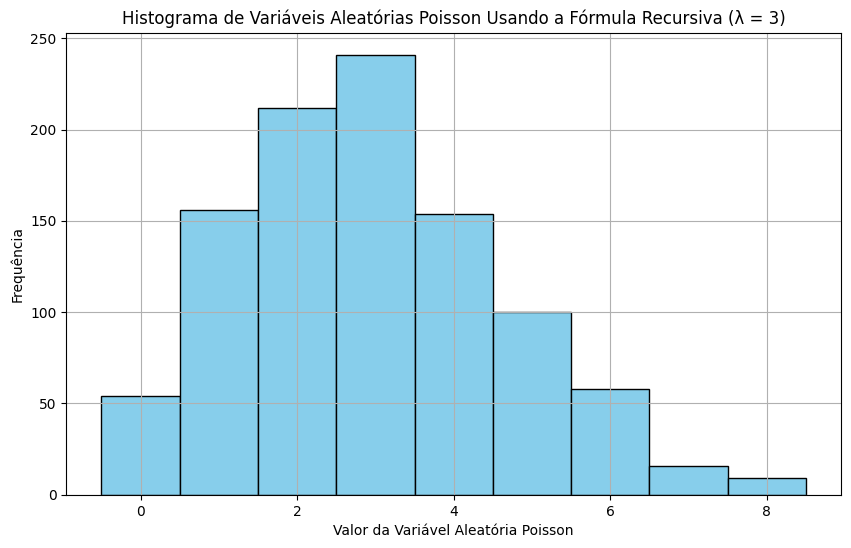

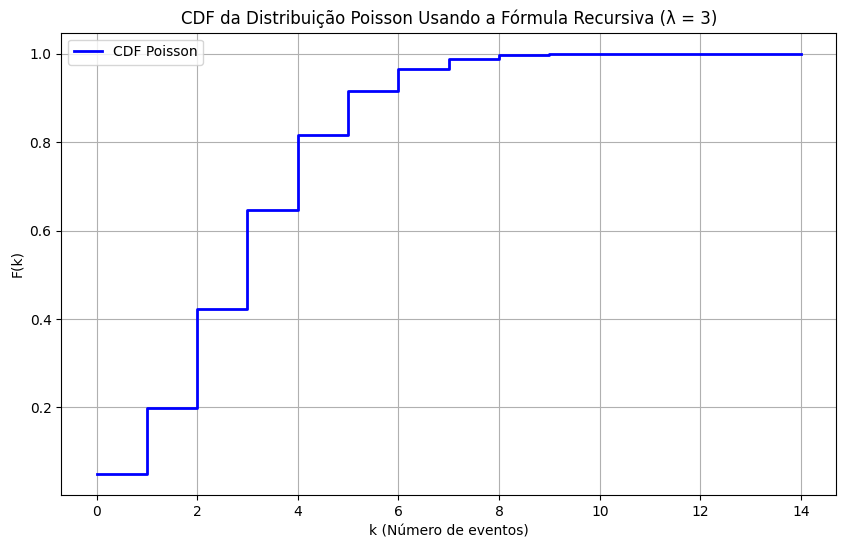

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Função para gerar a inversa da CDF para a distribuição Poisson usando a técnica de inversão e a fórmula recursiva
def inversa_cdf_poisson_recursiva(lam, u):
    k = 0
    p = math.exp(-lam)  # P(X=0)
    F = p  # Iniciamos com a probabilidade P(X=0)
    
    # Continuamos somando até que F >= u
    while u > F:
        k += 1
        p = p * lam / k  # Atualiza a probabilidade recursivamente para o próximo valor
        F += p
    
    return k

# Parâmetro lambda da distribuição Poisson
lam = 3

# Gerando 1000 números uniformemente distribuídos
uniformes = np.random.uniform(0, 1, 1000)

# Gerando a variável aleatória Poisson correspondente para cada número uniforme
poisson_vars = [inversa_cdf_poisson_recursiva(lam, u) for u in uniformes]

# Plotando o histograma das variáveis Poisson geradas
plt.figure(figsize=(10, 6))
plt.hist(poisson_vars, bins=range(0, max(poisson_vars) + 1), color='skyblue', edgecolor='black', align='left')
plt.title('Histograma de Variáveis Aleatórias Poisson Usando a Fórmula Recursiva (λ = 3)')
plt.xlabel('Valor da Variável Aleatória Poisson')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Calculando a CDF da distribuição Poisson
def cdf_poisson(k, lam):
    cdf = 0
    p = math.exp(-lam)  # P(X=0)
    for i in range(k+1):
        cdf += p  # Adiciona a probabilidade à CDF
        if i < k:  # Atualiza a probabilidade recursivamente
            p = p * lam / (i + 1)
    return cdf

# Gerando valores de k para a CDF
k_values = np.arange(0, 15)
cdf_values = [cdf_poisson(k, lam) for k in k_values]

# Plotando a CDF da distribuição Poisson
plt.figure(figsize=(10, 6))
plt.step(k_values, cdf_values, where='post', color='blue', label='CDF Poisson', linewidth=2)
plt.title('CDF da Distribuição Poisson Usando a Fórmula Recursiva (λ = 3)')
plt.xlabel('k (Número de eventos)')
plt.ylabel('F(k)')
plt.grid(True)
plt.legend()
plt.show()
